# **Comprehensive Analysis of Avocado Prices and Sales Volumes**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

print('setup complete')

/kaggle/input/avocado-prices/avocado.csv
setup complete


In [2]:
# Load dataset
file_path = "/kaggle/input/avocado-prices/avocado.csv"
df = pd.read_csv(file_path, parse_dates=['Date'], index_col=0)

# Handle missing values
df = df.dropna()

# Convert data types
df['Date'] = pd.to_datetime(df['Date'])

# Check for duplicates
df = df.drop_duplicates()

# Verify data consistency
if (df['Total Volume'] < 0).any():
    df = df[df['Total Volume'] >= 0]

# Summary of cleaned data
print(df.info())
print(df.describe())


df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.9+ MB
None
                                Date  AveragePrice  Total Volum

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.type.value_counts()

type
conventional    9126
organic         9123
Name: count, dtype: int64

In [4]:
df.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

## **1. Price Trend Analysis**

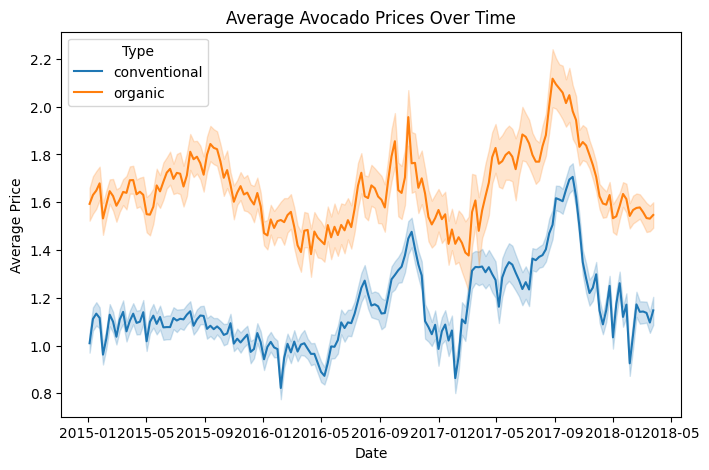

In [26]:
# Plot price trends
plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x='Date', y='AveragePrice', hue='type')
plt.title('Average Avocado Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend(title='Type')
plt.show()

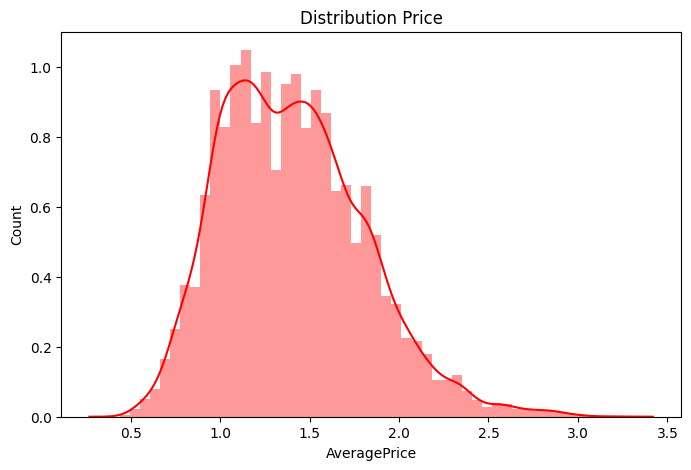

In [27]:
# Plot price distribution 
plt.figure(figsize=(8,5))
plt.title("Distribution Price")
sns.distplot(df["AveragePrice"], color = 'r')
plt.xlabel('AveragePrice')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='AveragePrice', ylabel='type'>

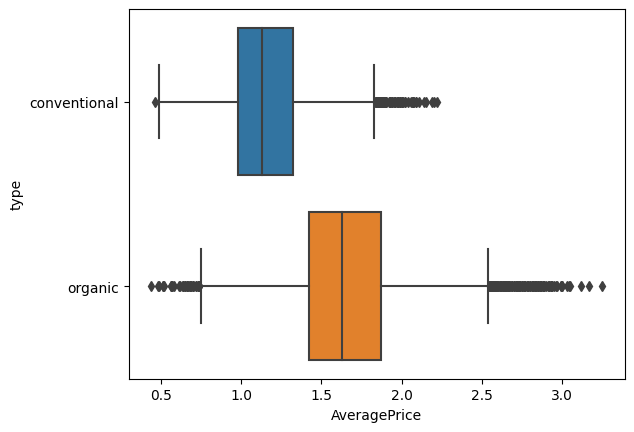

In [28]:
sns.boxplot(y="type", x="AveragePrice", data=df)

### **What is the correlation between average price and total volume?**

Correlation between Average Price and Total Volume: -0.19


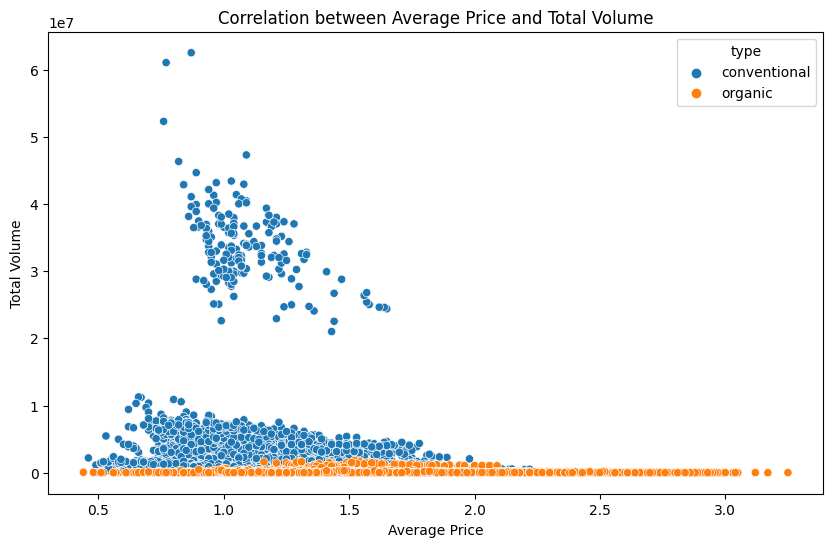

In [7]:
# Calculate correlation
correlation = df[['AveragePrice', 'Total Volume']].corr().iloc[0, 1]
print(f"Correlation between Average Price and Total Volume: {correlation:.2f}")

# Plot scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='AveragePrice', y='Total Volume', hue='type')
plt.title('Correlation between Average Price and Total Volume')
plt.xlabel('Average Price')
plt.ylabel('Total Volume')
plt.show()

## **2. Regional Price Comparison**

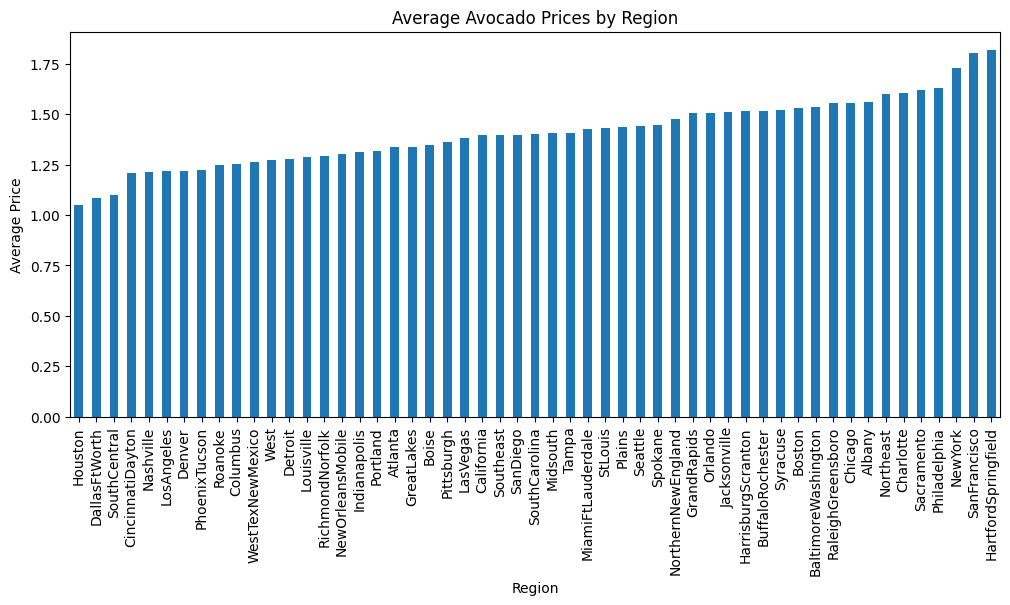

In [29]:
# Group by region and calculate average price
df_without_TotalUS = df.loc[(df.region != 'TotalUS')]
region_prices = df_without_TotalUS.groupby('region')['AveragePrice'].mean().sort_values()

# Plot regional price comparison
plt.figure(figsize=(12, 5))
region_prices.plot(kind='bar')
plt.title('Average Avocado Prices by Region')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

### **Which regions have the highest average avocado prices?**

In [9]:
# Display the top 5 regions
avg_price_by_region = df.groupby('region')['AveragePrice'].mean().sort_values(ascending=False)
top_5_regions = avg_price_by_region.head(5)
print("Top 5 Regions with Highest Average Avocado Prices:\n", top_5_regions)

Top 5 Regions with Highest Average Avocado Prices:
 region
HartfordSpringfield    1.818639
SanFrancisco           1.804201
NewYork                1.727574
Philadelphia           1.632130
Sacramento             1.621568
Name: AveragePrice, dtype: float64


### **Price of Conventional Avocados per region, over time?**

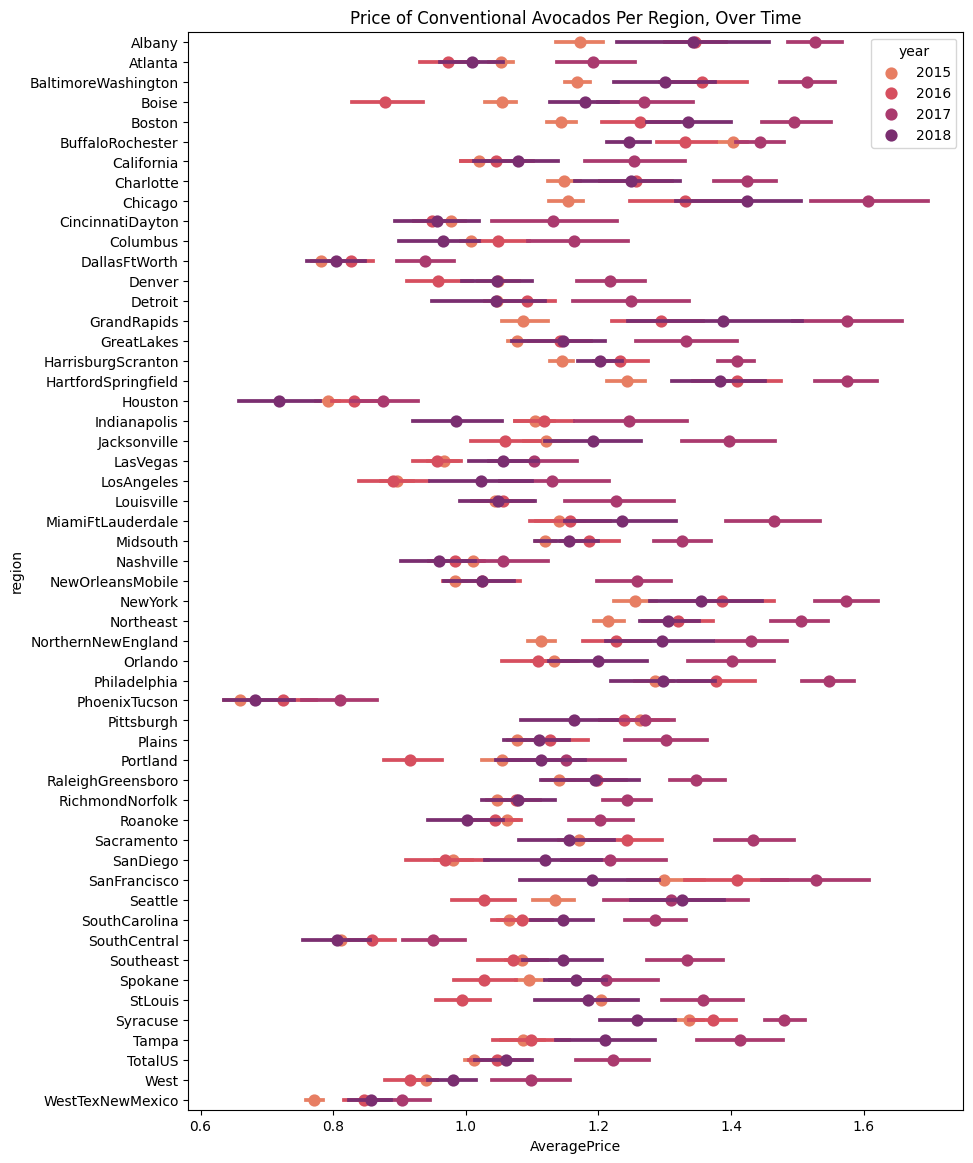

In [32]:
plt.figure(figsize=(10, 14))
sns.pointplot(x='AveragePrice',y='region',data=df[df['type']=='conventional'],hue='year',join=False,palette='flare')
plt.title('Price of Conventional Avocados Per Region, Over Time')
plt.show()

## **3. Sales Volume Analysis**

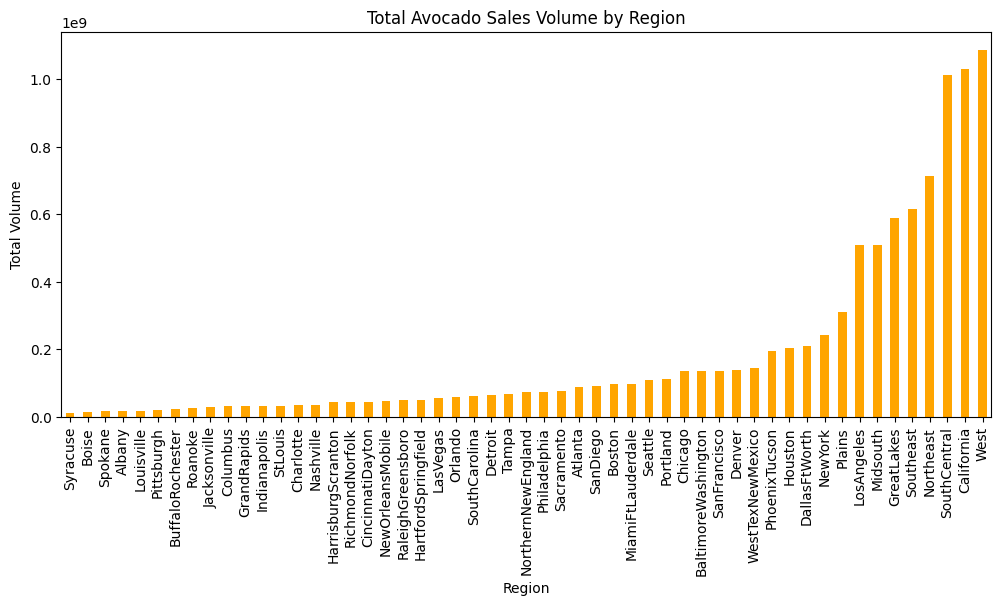

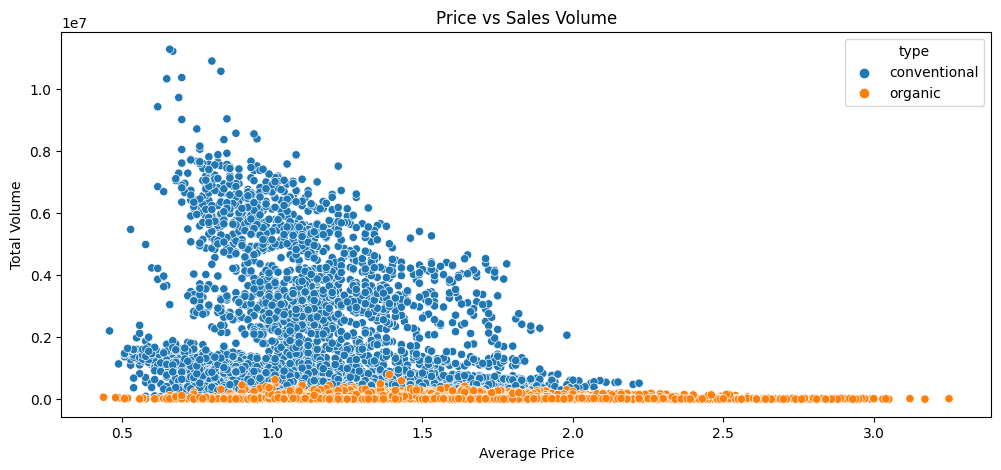

In [33]:
# Group by region and calculate total volume
region_volume = df_without_TotalUS.groupby('region')['Total Volume'].sum().sort_values()

# Plot total volume by region
plt.figure(figsize=(12, 5))
region_volume.plot(kind='bar', color='orange')
plt.title('Total Avocado Sales Volume by Region')
plt.xlabel('Region')
plt.ylabel('Total Volume')
plt.xticks(rotation=90)
plt.show()

# Scatter plot of price vs volume
plt.figure(figsize=(12, 5))
sns.scatterplot(data=df_without_TotalUS, x='AveragePrice', y='Total Volume', hue='type')
plt.title('Price vs Sales Volume')
plt.xlabel('Average Price')
plt.ylabel('Total Volume')
plt.show()

### **Over the years, what are the trends in sales volume of each year for each type?**

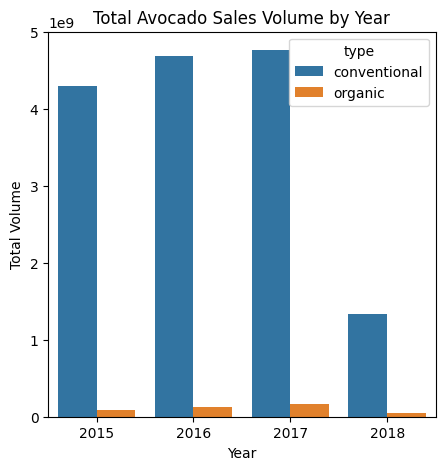

In [25]:
# Group by year and type and calculate total volume
total_volume_by_year = df.groupby(['year','type'])['Total Volume'].sum()
total_volume_by_year = total_volume_by_year.to_frame().reset_index()

# Plot total volume by year
plt.figure(figsize=(5, 5))
sns.barplot(data=total_volume_by_year, x='year', y='Total Volume', hue='type')
plt.title('Total Avocado Sales Volume by Year')
plt.xlabel('Year')
plt.ylabel('Total Volume')
plt.show()